Sets are particular in the sense that they have no order. <br>
Learning on sets thus requires techniques that are permutation invariant: $\forall \pi \in \mathcal{P}_n, f(\pi(x)) = f(x)$

(NB: Equivariant means $f(\pi(x)) = \pi(f(x))$)

Paper showed that a function is permutation invariant $\iff$ it can be written as $\phi(\sum_{x \in \mathcal{X}} \psi(x_i))$ for some functions $\phi$ and $\psi$.
We use MLP to approximate $\phi$ and $\psi$.

In [1]:
import numpy as np

import time
import torch
import torch.optim as optim
import torch.nn as nn

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error


# Utils

In [2]:
def create_train_dataset():
    n_train = 100000
    max_train_card = 10

    ############## Task 1
    
    ##################
    # your code here #
    ##################


    X_train = np.zeros((n_train, max_train_card))
    y_train = np.zeros(n_train)

    for i in range(n_train):
        card = np.random.randint(1, max_train_card+1)
        X_train[i,-card:] = np.random.randint(1, max_train_card+1, size = card)
        y_train[i] = np.sum(X_train[i,:])

    print("The 1st training sample is ", X_train[0,:])
    print("The 1st label is ", y_train[0])

    return X_train, y_train


def create_test_dataset():
    
    ############## Task 2
    
    ##################
    # your code here #
    ##################

    n_test = 200000
    min_test_card = 5
    max_test_card = 101
    step_test_card = 5
    cards = range(min_test_card, max_test_card, step_test_card)
    n_samples_per_card = n_test // len(cards)

    X_test = list()
    y_test = list()

    for card in cards:
        X = np.random.randint(1,11, size=(n_samples_per_card, card))
        y = np.sum(X, axis=1)

        X_test.append(X)
        y_test.append(y)

    return X_test, y_test

# Models

In [3]:
class DeepSets(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim):
        super(DeepSets, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        
        ############## Task 3

        x = self.embedding(x)
        x = self.tanh(self.fc1(x))
        x = torch.sum(x, dim=1)
        x = self.fc2(x)
    
        ##################
        # your code here #
        ##################
        
        return x.squeeze()


class LSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim):
        super(LSTM, self).__init__()

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        
        ############## Task 4

        x = self.embedding(x)
        _, (x, _) = self.lstm(x)
        x = self.fc(x)
    
        ##################
        # your code here #
        ##################
        
        return x.squeeze()

# Train

In [4]:
# Initializes device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
epochs = 20
batch_size = 64
embedding_dim = 128
hidden_dim = 64
learning_rate = 0.001

# Generates training data
X_train, y_train = create_train_dataset()
n_train = 100000
n_digits = 11

# Initializes DeepSets model and optimizer
deepsets = DeepSets(n_digits, embedding_dim, hidden_dim).to(device)
optimizer = optim.Adam(deepsets.parameters(), lr=learning_rate)
loss_function = nn.L1Loss()

# Trains the DeepSets model
for epoch in range(epochs):
    t = time.time()
    deepsets.train()
     
    train_loss = 0
    count = 0
    idx = np.random.permutation(n_train)
    for i in range(0, n_train, batch_size):
        
        ############## Task 5
    
        ##################
        # your code here #
        ##################

        x_batch = X_train[idx[i:min(i+batch_size, n_train)],:]
        y_batch = y_train[idx[i:min(i+batch_size, n_train)]]

        x_batch = torch.LongTensor(x_batch).to(device)
        y_batch = torch.FloatTensor(y_batch).to(device)
        
        optimizer.zero_grad()
        output = deepsets(x_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * output.size(0)
        count += output.size(0)
    
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(train_loss / count),
          'time: {:.4f}s'.format(time.time() - t))

# Stores DeepSets model into disk
torch.save({
    'state_dict': deepsets.state_dict(),
    'optimizer' : optimizer.state_dict(),
}, 'model_deepsets.pth.tar')

print("Finished training for DeepSets model")
print()

The 1st training sample is  [ 1.  1.  5.  3.  2.  7.  5. 10.  7.  6.]
The 1st label is  47.0
Epoch: 0001 loss_train: 0.9558 time: 0.8661s
Epoch: 0002 loss_train: 0.0728 time: 0.7988s
Epoch: 0003 loss_train: 0.0546 time: 0.8138s
Epoch: 0004 loss_train: 0.0447 time: 0.8069s
Epoch: 0005 loss_train: 0.0398 time: 0.8071s
Epoch: 0006 loss_train: 0.0377 time: 0.7853s
Epoch: 0007 loss_train: 0.0350 time: 0.7644s
Epoch: 0008 loss_train: 0.0291 time: 0.7695s
Epoch: 0009 loss_train: 0.0312 time: 0.7666s
Epoch: 0010 loss_train: 0.0292 time: 0.7860s
Epoch: 0011 loss_train: 0.0306 time: 0.7851s
Epoch: 0012 loss_train: 0.0280 time: 0.8038s
Epoch: 0013 loss_train: 0.0295 time: 0.7887s
Epoch: 0014 loss_train: 0.0266 time: 0.7867s
Epoch: 0015 loss_train: 0.0260 time: 0.7666s
Epoch: 0016 loss_train: 0.0269 time: 0.7850s
Epoch: 0017 loss_train: 0.0257 time: 0.7820s
Epoch: 0018 loss_train: 0.0268 time: 0.7678s
Epoch: 0019 loss_train: 0.0265 time: 0.7715s
Epoch: 0020 loss_train: 0.0269 time: 0.7618s
Finishe

In [5]:

# Initializes LSTM model and optimizer
lstm = LSTM(n_digits, embedding_dim, hidden_dim).to(device)
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)
loss_function = nn.L1Loss()

# Trains the LSTM model
for epoch in range(epochs):
    t = time.time()
    lstm.train()
     
    train_loss = 0
    count = 0
    idx = np.random.permutation(n_train)
    for i in range(0, n_train, batch_size):
    
        ############## Task 5
        
        ##################
        # your code here #
        ##################

        x_batch = X_train[idx[i:min(i+batch_size, n_train)],:]
        y_batch = y_train[idx[i:min(i+batch_size, n_train)]]

        x_batch = torch.LongTensor(x_batch).to(device)
        y_batch = torch.FloatTensor(y_batch).to(device)
        
        optimizer.zero_grad()
        output = lstm(x_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * output.size(0)
        count += output.size(0)
    
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(train_loss / count),
          'time: {:.4f}s'.format(time.time() - t))

# Stores LSTM model into disk
torch.save({
    'state_dict': lstm.state_dict(),
    'optimizer' : optimizer.state_dict(),
}, 'model_lstm.pth.tar')

print("Finished training for LSTM model")

Epoch: 0001 loss_train: 6.0248 time: 3.7589s
Epoch: 0002 loss_train: 0.2749 time: 4.4831s
Epoch: 0003 loss_train: 0.1561 time: 3.7797s
Epoch: 0004 loss_train: 0.1242 time: 3.9157s
Epoch: 0005 loss_train: 0.1123 time: 3.7673s
Epoch: 0006 loss_train: 0.1008 time: 3.7623s
Epoch: 0007 loss_train: 0.0989 time: 3.7340s
Epoch: 0008 loss_train: 0.0917 time: 3.7647s
Epoch: 0009 loss_train: 0.0912 time: 3.7838s
Epoch: 0010 loss_train: 0.0893 time: 3.7604s
Epoch: 0011 loss_train: 0.0838 time: 3.7642s
Epoch: 0012 loss_train: 0.0849 time: 3.6854s
Epoch: 0013 loss_train: 0.0814 time: 3.7456s
Epoch: 0014 loss_train: 0.0819 time: 3.7402s
Epoch: 0015 loss_train: 0.0786 time: 3.7397s
Epoch: 0016 loss_train: 0.0790 time: 3.7326s
Epoch: 0017 loss_train: 0.0781 time: 3.7414s
Epoch: 0018 loss_train: 0.0764 time: 3.7492s
Epoch: 0019 loss_train: 0.0763 time: 3.7369s
Epoch: 0020 loss_train: 0.0774 time: 3.7486s
Finished training for LSTM model


# Eval

In [6]:
# Initializes device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
batch_size = 64
embedding_dim = 128
hidden_dim = 64

# Generates test data
X_test, y_test = create_test_dataset()
cards = [X_test[i].shape[1] for i in range(len(X_test))]
n_samples_per_card = X_test[0].shape[0]
n_digits = 11

# Retrieves DeepSets model
deepsets = DeepSets(n_digits, embedding_dim, hidden_dim).to(device)
print("Loading DeepSets checkpoint!")
checkpoint = torch.load('model_deepsets.pth.tar')
deepsets.load_state_dict(checkpoint['state_dict'])
deepsets.eval()

# Retrieves LSTM model
lstm = LSTM(n_digits, embedding_dim, hidden_dim).to(device)
print("Loading LSTM checkpoint!")
checkpoint = torch.load('model_lstm.pth.tar')
lstm.load_state_dict(checkpoint['state_dict'])
lstm.eval()

# Dict to store the results
results = {'deepsets': {'acc':[], 'mae':[]}, 'lstm': {'acc':[], 'mae':[]}}

Loading DeepSets checkpoint!
Loading LSTM checkpoint!


In [7]:
for i in range(len(cards)):
    y_pred_deepsets = list()
    y_pred_lstm = list()
    for j in range(0, n_samples_per_card, batch_size):
        
        ############## Task 6
    
        ##################
        # your code here #
        ##################

        
        x_batch = X_test[i][j:min(j+batch_size, n_samples_per_card),:]
        # y_batch = y_test[i][j:min(j+batch_size, n_samples_per_card)]

        x_batch = torch.LongTensor(x_batch).to(device)
        y_batch = torch.FloatTensor(y_batch)

        output_deepsets = deepsets(x_batch)
        y_pred_deepsets.append(output_deepsets)

        output_lstm = lstm(x_batch)
        y_pred_lstm.append(output_lstm)
        
        
    y_pred_deepsets = torch.cat(y_pred_deepsets)
    y_pred_deepsets = y_pred_deepsets.detach().cpu().numpy()
    
    acc_deepsets = accuracy_score(y_test[i], np.round(y_pred_deepsets)) #your code here
    mae_deepsets = mean_absolute_error(y_test[i], y_pred_deepsets) #your code here
    results['deepsets']['acc'].append(acc_deepsets)
    results['deepsets']['mae'].append(mae_deepsets)
    
    y_pred_lstm = torch.cat(y_pred_lstm)
    y_pred_lstm = y_pred_lstm.detach().cpu().numpy()
    
    acc_lstm = accuracy_score(y_test[i], np.round(y_pred_lstm)) #your code here
    mae_lstm = mean_absolute_error(y_test[i], y_pred_lstm) #your code here
    results['lstm']['acc'].append(acc_lstm)
    results['lstm']['mae'].append(mae_lstm)



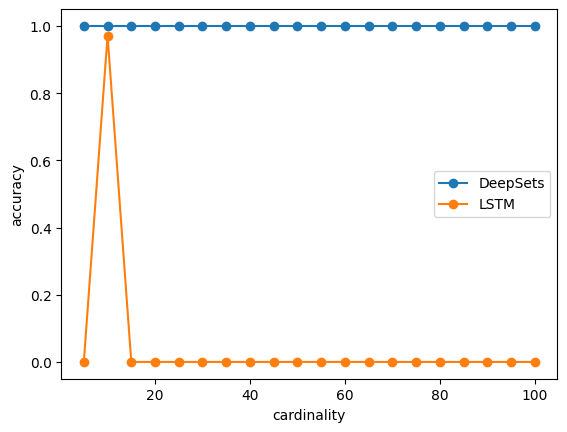

In [14]:
############## Task 7
    
##################
# your code here #
##################

plt.plot(cards, results['deepsets']['acc'], '-o', label="DeepSets") 
plt.plot(cards, results['lstm']['acc'], '-o', label="LSTM")
plt.xlabel('cardinality')
plt.ylabel('accuracy')
plt.legend()